In [1]:
import pandas as pd
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp
import numpy as np
from hyperopt import Trials, tpe, fmin
import warnings
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from nbimporter import NotebookLoader
from joblib import load
import statistics
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, matthews_corrcoef, precision_score, recall_score
import time
warnings.filterwarnings("ignore")

In [2]:
ma = pd.read_csv("../16 Mycoplosma/ma.csv")
map = pd.read_csv("../16 Mycoplosma/map.csv")
marth = pd.read_csv("../16 Mycoplosma/marth.csv")
mcap = pd.read_csv("../16 Mycoplosma/mcap.csv")
mcon = pd.read_csv("../16 Mycoplosma/mcon.csv")
mcro = pd.read_csv("../16 Mycoplosma/mcro.csv")
mgal = pd.read_csv("../16 Mycoplosma/mgal.csv")
mhom = pd.read_csv("../16 Mycoplosma/mhom.csv")
mhyoJ = pd.read_csv("../16 Mycoplosma/mhyoJ.csv")
mhyo232 = pd.read_csv("../16 Mycoplosma/mhyo232.csv")
mhyo7448 = pd.read_csv("../16 Mycoplosma/mhyo7448.csv")
mm163K = pd.read_csv("../16 Mycoplosma/mm163K.csv")
mms = pd.read_csv("../16 Mycoplosma/mms.csv")
mpHF = pd.read_csv("../16 Mycoplosma/mpHF.csv")
mpM = pd.read_csv("../16 Mycoplosma/mpM.csv")
ms53 = pd.read_csv("../16 Mycoplosma/ms53.csv")

In [3]:
def generate_train_test_dataset(index):
    dataset_names = [ma, map, marth, mcap, mcon, mcro, mgal, mhom, mhyoJ, mhyo232, mhyo7448, mm163K, mms, mpHF, mpM, ms53]
    merged_train = dataset_names[:index]+dataset_names[index+1:]
    train_data = pd.concat(merged_train)
    test_data = dataset_names[index]
    return train_data,test_data

In [4]:
def handle_dataset(dataset):
    columns_to_drop = ['identity','name', 'Amino acid', 'protein_sequence', 'essentiality']
    Xs = dataset.drop(columns = columns_to_drop)
    y = dataset['essentiality']
    return Xs,y

In [5]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [6]:
model_mlp = load('../../model/MLP_model.joblib')
scores_mlp_ac = []
scores_mlp_f1 = []
scores_mlp_auc = []
scores_mlp_mcc =[]
scores_mlp_precision = []
scores_mlp_recall = []
for i in range(0,16):
    
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    
    model_mlp.fit(X_resampled,y_resampled)
    y_predict = model_mlp.predict(Xs_test)
    acc=accuracy_score(y_test, y_predict)
    scores_mlp_ac.append(acc)
    f1 = f1_score(y_test,y_predict)
    scores_mlp_f1.append(f1)
    auc = roc_auc_score(y_test,y_predict)
    scores_mlp_auc.append(auc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_mlp_mcc.append(mcc)
    precision = precision_score(y_test,y_predict)
    scores_mlp_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_mlp_recall.append(recall)

In [9]:
model_svm = load('../../model/SVM_model.joblib')
scores_svm_ac = []
scores_svm_mcc = []
scores_svm_auc = []
scores_svm_f1 = []
scores_svm_precision = []
scores_svm_recall = []
running_svm = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    start_time = time.time()
    model_svm.fit(X_resampled,y_resampled)
    y_predict = model_svm.predict(Xs_test)
    end_time=time.time()
    running_svm.append(end_time-start_time)
    acc=accuracy_score(y_test, y_predict)
    scores_svm_ac.append(acc)
    auc = roc_auc_score(y_test,y_predict)
    scores_svm_auc.append(auc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_svm_mcc.append(mcc)
    f1 = f1_score(y_test,y_predict)
    scores_svm_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_svm_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_svm_recall.append(recall)

In [8]:
model_nb = load('../../model/NB_model.joblib')
scores_nb_ac = []
scores_nb_mcc = []
scores_nb_auc = []
scores_nb_f1 = []
scores_nb_precision = []
scores_nb_recall = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_nb.fit(X_resampled,y_resampled)
    y_predict = model_nb.predict(Xs_test)
    acc=accuracy_score(y_test, y_predict)
    scores_nb_ac.append(acc)
    auc = roc_auc_score(y_test,y_predict)
    scores_nb_auc.append(auc)
    mcc =matthews_corrcoef(y_test,y_predict)
    scores_nb_mcc.append(mcc)
    f1 = f1_score(y_test,y_predict)
    scores_nb_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_nb_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_nb_recall.append(recall)

In [10]:
model_rf = load('../../model/RF_model.joblib')
scores_rf_ac = []
scores_rf_mcc= []
scores_rf_f1 = []
scores_rf_auc = []
scores_rf_precision = []
scores_rf_recall = []
running_rf = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    start_time = time.time()
    model_rf.fit(X_resampled,y_resampled)
    y_predict = model_rf.predict(Xs_test)
    end_time=time.time()
    running_rf.append(end_time-start_time)
    acc=accuracy_score(y_test, y_predict)
    scores_rf_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_rf_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_rf_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_rf_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_rf_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_rf_recall.append(recall)

In [14]:
import time

model_xgb = load('../../model/XGB_model.joblib')
scores_xgb_ac = []
scores_xgb_mcc = []
scores_xgb_auc = []
scores_xgb_f1 = []
scores_xgb_precision = []
scores_xgb_recall = []
running_times= []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    start_time = time.time()
    model_xgb.fit(X_resampled,y_resampled)
    y_predict = model_xgb.predict(Xs_test)
    end_time = time.time()
    running_times.append(end_time-start_time)
    acc=accuracy_score(y_test, y_predict)
    scores_xgb_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_xgb_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_xgb_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_xgb_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_xgb_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_xgb_recall.append(recall)

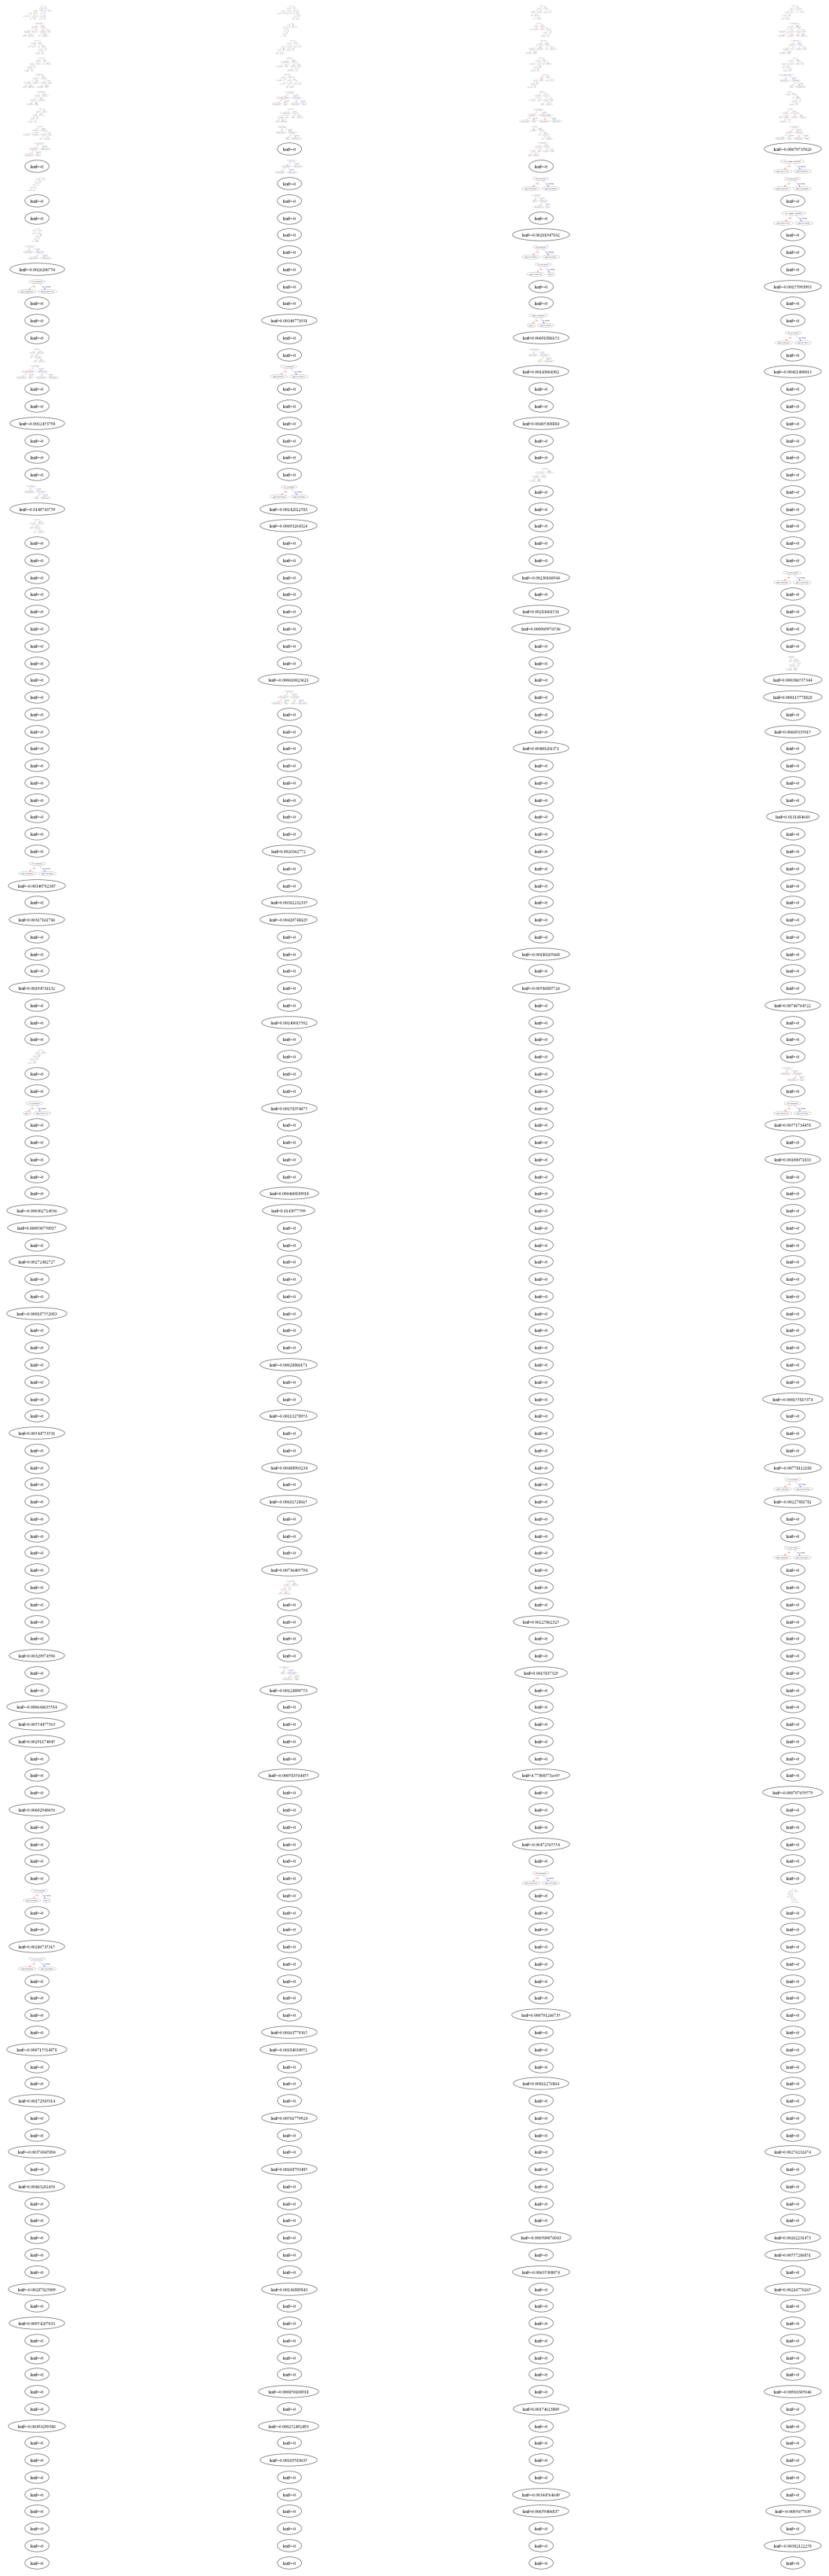

In [25]:
import math
from xgboost import plot_tree
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'D:/Graphviz-10.0.1-win64/bin'
num_trees = model_xgb.n_estimators
cols = 4
rows = math.ceil(num_trees / cols)
fig, axs = plt.subplots(rows, cols, figsize=(22, 60), sharex=False, sharey=False)

for i in range(num_trees):
    row = int(i / cols)
    col = int(i % cols)
    ax = axs[row, col]
    plot_tree(model_xgb, num_trees=i, ax=ax)
#plt.savefig("../xgb_nfs",dpi=1000)
#plt.show()

In [8]:
print(statistics.mean(running_times),statistics.variance(running_times))

0.36415036022663116 0.09661835775892934


In [11]:
print(statistics.mean(running_svm),statistics.variance(running_svm))
print(statistics.mean(running_rf),statistics.variance(running_rf))

30.996520310640335 51.88832952490133
1.6855084300041199 0.07984821374802399


In [12]:
print(scores_xgb_recall)

[0.9130434782608695, 0.8, 0.5625, 1.0, 0.7894736842105263, 0.8076923076923077, 0.9130434782608695, 0.8947368421052632, 0.875, 0.9354838709677419, 0.9375, 0.7727272727272727, 0.8, 0.9, 0.5756097560975609, 0.8181818181818182]


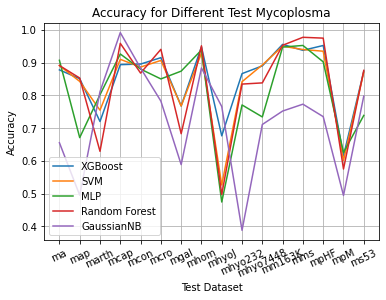

In [14]:
import matplotlib.pyplot as plt
x = ["ma", "map", "marth", "mcap", "mcon", "mcro", "mgal", "mhom", "mhyoJ", "mhyo232", "mhyo7448", "mm163K", "mms", "mpHF", "mpM", "ms53"]
plt.plot(x, scores_xgb_ac, label='XGBoost')
plt.plot(x, scores_svm_ac, label='SVM')
plt.plot(x, scores_mlp_ac, label='MLP')
plt.plot(x, scores_rf_ac, label='Random Forest')
plt.plot(x,scores_nb_ac,label = 'GaussianNB')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for Different Test Mycoplosma')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('../Acc.jpg')
plt.show()

In [16]:
from scipy.stats import ks_2samp
p_values = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_svm.fit(X_resampled,y_resampled)
    y_predict_svm = model_svm.predict(Xs_test)
    model_xgb.fit(X_resampled,y_resampled)
    y_predict_xgb = model_xgb.predict(Xs_test)
    ks_statistic, p_value = ks_2samp(y_predict_xgb,y_predict_svm)
    p_values.append(p_value)
print(np.mean(p_values))

0.8670187106363801


In [7]:
#with feature selections
model_xgb_fs = load('../../model/XGB_FS_model.joblib')
scores_xgb_fs_ac = []
scores_xgb_fs_mcc = []
scores_xgb_fs_auc = []
scores_xgb_fs_f1 = []
scores_xgb_fs_precision = []
scores_xgb_fs_recall = []


In [9]:
from sklearn.feature_selection import RFE
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    rfe = RFE(model_xgb_fs, n_features_to_select=6)
    X_selected = rfe.fit_transform(X_resampled, y_resampled)
    Xs_test = rfe.fit_transform(Xs_test,y_test)
    all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V","nSE2","nSE3","nGE2","nGE3"]
    selected_feature_indices = rfe.get_support(indices=True)
    selected_feature_names = [all_feature_names[index-1] for index in selected_feature_indices]
    print("Selected feature names:", selected_feature_names)
    model_xgb_fs.fit(X_selected,y_resampled)
    y_predict = model_xgb_fs.predict(Xs_test)
    acc=accuracy_score(y_test, y_predict)
    scores_xgb_fs_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_xgb_fs_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_xgb_fs_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_xgb_fs_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_xgb_fs_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_xgb_fs_recall.append(recall)

Selected feature names: ['GC_Content', 'CAI', 'R', 'G', 'L', 'F']
Selected feature names: ['GC_Content', 'CAI', 'R', 'N', 'G', 'F']
Selected feature names: ['nGE3', 'A', 'L', 'K', 'P', 'V']
Selected feature names: ['I', 'L', 'nSE2', 'nSE3', 'nGE2', 'nGE3']
Selected feature names: ['CAI', 'N', 'G', 'I', 'W', 'nSE2']
Selected feature names: ['nGE3', 'GC_Content', 'R', 'G', 'L', 'nGE2']
Selected feature names: ['GC_Content', 'R', 'N', 'G', 'I', 'L']
Selected feature names: ['GC_Content', 'R', 'N', 'L', 'K', 'F']
Selected feature names: ['nGE3', 'GC_Content', 'A', 'C', 'G', 'M']
Selected feature names: ['GC_Content', 'N', 'Q', 'G', 'I', 'F']
Selected feature names: ['GC_Content', 'N', 'I', 'F', 'T', 'Y']
Selected feature names: ['GC_Content', 'A', 'R', 'N', 'G', 'H']
Selected feature names: ['G', 'I', 'K', 'P', 'nSE2', 'nGE2']
Selected feature names: ['GC_Content', 'R', 'N', 'G', 'S', 'nSE2']
Selected feature names: ['GC_Content', 'R', 'Q', 'E', 'I', 'M']
Selected feature names: ['GC_Conte

In [ ]:
select_xgb= ['GC_Content', 'R', 'K', 'M', 'S', 'nSE2']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_xgb_fs.fit(X_resampled[select_xgb],y_resampled)
    y_predict = model_xgb_fs.predict(Xs_test[select_xgb])
    acc=accuracy_score(y_test, y_predict)
    scores_xgb_fs_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_xgb_fs_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_xgb_fs_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_xgb_fs_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_xgb_fs_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_xgb_fs_recall.append(recall)

In [14]:
model_rf_fs = load("../../model/RF_FS_model.joblib")
scores_rf_fs_ac = []
scores_rf_fs_mcc= []
scores_rf_fs_f1 = []
scores_rf_fs_auc = []
scores_rf_fs_precision = []
scores_rf_fs_recall = []

for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_rf_fs.fit(X_resampled[select_rf],y_resampled)
    y_predict = model_rf_fs.predict(Xs_test[select_rf])
    acc=accuracy_score(y_test, y_predict)
    scores_rf_fs_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_rf_fs_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_rf_fs_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_rf_fs_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_rf_fs_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_rf_fs_recall.append(recall)

In [ ]:
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    rfe = RFE(model_rf_fs, n_features_to_select=9)
    X_selected = rfe.fit_transform(X_resampled, y_resampled)
    Xs_test = rfe.fit_transform(Xs_test,y_test)
    all_feature_names = ["GC_Content","CAI","A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V","nSE2","nSE3","nGE2","nGE3"]
    selected_feature_indices = rfe.get_support(indices=True)
    selected_feature_names = [all_feature_names[index-1] for index in selected_feature_indices]
    print("Selected feature names:", selected_feature_names)
    model_rf_fs.fit(X_selected,y_resampled)
    y_predict = model_rf_fs.predict(Xs_test)
    acc=accuracy_score(y_test, y_predict)
    scores_rf_fs_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_rf_fs_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_rf_fs_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_rf_fs_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_rf_fs_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_rf_fs_recall.append(recall)

In [13]:
model_svm_fs = load("../../model/SVM_model.joblib")
scores_svm_fs_ac = []
scores_svm_fs_mcc = []
scores_svm_fs_auc = []
scores_svm_fs_f1 = []
scores_svm_fs_precision = []
scores_svm_fs_recall = []
feature_svm =['CAI', 'R', 'N', 'D', 'C', 'Q', 'G', 'H', 'F', 'P', 'T', 'Y', 'nSE2', 'nGE2']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_svm_fs.fit(X_resampled[feature_svm],y_resampled)
    y_predict = model_svm_fs.predict(Xs_test[feature_svm])
    acc=accuracy_score(y_test, y_predict)
    scores_svm_fs_ac.append(acc)
    auc = roc_auc_score(y_test,y_predict)
    scores_svm_fs_auc.append(auc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_svm_fs_mcc.append(mcc)
    f1 = f1_score(y_test,y_predict)
    scores_svm_fs_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_svm_fs_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_svm_fs_recall.append(recall)

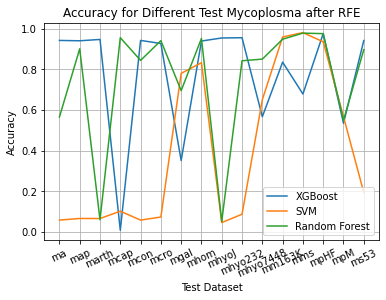

In [2]:
from matplotlib import pyplot as plt
x = ["ma", "map", "marth", "mcap", "mcon", "mcro", "mgal", "mhom", "mhyoJ", "mhyo232", "mhyo7448", "mm163K", "mms", "mpHF", "mpM", "ms53"]
scores_xgb_fs_ac = [0.941645,0.939959,0.946541,0.008163,0.941718,0.926554,0.351090,0.938710,0.953757,0.955007,0.566474,0.834711,0.678304,0.975000,0.534413,0.941011]
scores_svm_fs_ac=[0.058355,0.066253,0.066038,0.102041,0.058282,0.073446,0.779661,0.832258,0.046243,0.087083,0.650289,0.958678,0.980050,0.935000,0.566802,0.193820]
scores_rf_fs_ac = [0.564987,0.900621,0.059748,0.955102,0.843558,0.940678,0.694915,0.951613,0.052023,0.841800,0.849711,0.947658,0.977556,0.975000,0.548583,0.896067]
plt.plot(x, scores_xgb_fs_ac, label='XGBoost')
plt.plot(x, scores_svm_fs_ac, label='SVM')
plt.plot(x, scores_rf_fs_ac, label='Random Forest')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for Different Test Mycoplosma after RFE')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('../ACC_RFE.jpg')
plt.show()

In [24]:
from scipy.stats import ks_2samp
p_values = []
feature_rf = ['GC_Content', 'R', 'N', 'E', 'G', 'L', 'F', 'nSE2', 'nGE2']
feature_svm = ['CAI', 'R', 'N', 'D', 'C', 'Q', 'G', 'H', 'F', 'P', 'T', 'Y', 'nSE2', 'nGE2']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset()
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_rf_fs.fit(X_resampled[feature_rf],y_resampled)
    y_predict_rf = model_rf_fs.predict(Xs_test[feature_rf])
    model_svm_fs.fit(X_resampled[feature_svm],y_resampled)
    y_predict_svm = model_svm_fs.predict(Xs_test[feature_svm])
    ks_statistic, p_value = ks_2samp(y_predict_rf,y_predict_svm)
    p_values.append(p_value)
print(np.mean(p_values))

0.2742732912994939


In [21]:
with open('Model_scores.txt', 'w') as file:
    file.write("scores_mlp_acc:\n")
    np.savetxt(file,scores_mlp_ac,fmt='%1.6f')
    file.write("scores_mlp_auc:\n")
    np.savetxt(file,scores_mlp_auc,fmt='%1.6f')
    file.write("scores_mlp_mcc:\n")
    np.savetxt(file,scores_mlp_mcc,fmt='%1.6f')
    file.write("scores_mlp_f1:\n")
    np.savetxt(file,scores_mlp_f1,fmt='%1.6f')
    file.write("scores_mlp_precision:\n")
    np.savetxt(file,scores_mlp_precision,fmt='%1.6f')
    file.write("scores_mlp_recall:\n")
    np.savetxt(file,scores_mlp_recall,fmt='%1.6f')
    file.write("scores_svm_acc:\n")
    np.savetxt(file,scores_svm_ac,fmt='%1.6f')
    file.write("scores_svm_mcc:\n")
    np.savetxt(file,scores_svm_mcc,fmt='%1.6f')
    file.write("scores_svm_f1:\n")
    np.savetxt(file,scores_svm_f1,fmt='%1.6f')
    file.write("scores_svm_auc:\n")
    np.savetxt(file,scores_svm_auc,fmt='%1.6f')
    file.write("scores_svm_precision:\n")
    np.savetxt(file,scores_svm_precision,fmt='%1.6f')
    file.write("scores_svm_recall:\n")
    np.savetxt(file,scores_svm_recall,fmt='%1.6f')
    file.write("scores_xgb_acc:\n")
    np.savetxt(file,scores_xgb_ac,fmt='%1.6f')
    file.write("scores_xgb_auc:\n")
    np.savetxt(file,scores_xgb_auc,fmt='%1.6f')
    file.write("scores_xgb_mcc:\n")
    np.savetxt(file,scores_xgb_mcc,fmt='%1.6f')
    file.write("scores_xgb_f1:\n")
    np.savetxt(file,scores_xgb_f1,fmt='%1.6f')
    file.write("scores_xgb_precision:\n")
    np.savetxt(file, scores_xgb_precision,fmt='%1.6f')
    file.write("scores_xgb_recall:\n")
    np.savetxt(file, scores_xgb_recall,fmt='%1.6f')
    file.write("scores_nb_acc:\n")
    np.savetxt(file,scores_nb_ac,fmt='%1.6f')
    file.write("scores_nb_auc:\n")
    np.savetxt(file,scores_nb_auc,fmt='%1.6f')
    file.write("scores_nb_mcc:\n")
    np.savetxt(file,scores_nb_mcc,fmt='%1.6f')
    file.write("scores_nb_f1:\n")
    np.savetxt(file,scores_nb_f1,fmt='%1.6f')
    file.write("scores_nb_precision:\n")
    np.savetxt(file,scores_nb_precision,fmt='%1.6f')
    file.write("scores_nb_recall:\n")
    np.savetxt(file,scores_nb_recall,fmt='%1.6f')
    file.write("scores_rf_acc:\n")
    np.savetxt(file,scores_rf_ac,fmt='%1.6f')
    file.write("scores_rf_auc:\n")
    np.savetxt(file,scores_rf_auc,fmt='%1.6f')
    file.write("scores_rf_mcc:\n")
    np.savetxt(file,scores_rf_mcc,fmt='%1.6f')
    file.write("scores_rf_f1:\n")
    np.savetxt(file,scores_rf_f1,fmt='%1.6f')
    file.write("scores_rf_precision:\n")
    np.savetxt(file,scores_rf_precision,fmt='%1.6f')

In [22]:
with open('RFE_scores.txt', 'w') as file:
    file.write("scores_svm_fs_acc:\n")
    np.savetxt(file,scores_svm_fs_ac,fmt='%1.6f')
    file.write("scores_svm_fs_mcc:\n")
    np.savetxt(file,scores_svm_fs_mcc,fmt='%1.6f')
    file.write("scores_svm_fs_f1:\n")
    np.savetxt(file,scores_svm_fs_f1,fmt='%1.6f')
    file.write("scores_svm_fs_auc:\n")
    np.savetxt(file,scores_svm_fs_auc,fmt='%1.6f')
    file.write("scores_svm_fs_precision:\n")
    np.savetxt(file,scores_svm_fs_precision,fmt='%1.6f')
    file.write("scores_svm_fs_recall:\n")
    np.savetxt(file,scores_svm_fs_recall,fmt='%1.6f')
    file.write("scores_xgb_fs_acc:\n")
    np.savetxt(file,scores_xgb_fs_ac,fmt='%1.6f')
    file.write("scores_xgb_fs_auc:\n")
    np.savetxt(file,scores_xgb_fs_auc,fmt='%1.6f')
    file.write("scores_xgb_fs_mcc:\n")
    np.savetxt(file,scores_xgb_fs_mcc,fmt='%1.6f')
    file.write("scores_xgb_fs_f1:\n")
    np.savetxt(file,scores_xgb_fs_f1,fmt='%1.6f')
    file.write("scores_xgb_fs_precision:\n")
    np.savetxt(file, scores_xgb_fs_precision,fmt='%1.6f')
    file.write("scores_xgb_fs_recall:\n")
    np.savetxt(file, scores_xgb_fs_recall,fmt='%1.6f')
    file.write("scores_rf_fs_acc:\n")
    np.savetxt(file,scores_rf_fs_ac,fmt='%1.6f')
    file.write("scores_rf_fs_auc:\n")
    np.savetxt(file,scores_rf_fs_auc,fmt='%1.6f')
    file.write("scores_rf_fs_mcc:\n")
    np.savetxt(file,scores_rf_fs_mcc,fmt='%1.6f')
    file.write("scores_rf_fs_f1:\n")
    np.savetxt(file,scores_rf_fs_f1,fmt='%1.6f')
    file.write("scores_rf_fs_precision:\n")
    np.savetxt(file,scores_rf_fs_precision,fmt='%1.6f')

In [23]:
import csv

with open('Model.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['MLP',np.mean(scores_mlp_ac),np.mean(scores_mlp_mcc),np.mean(scores_mlp_auc),np.mean(scores_mlp_f1),np.mean(scores_mlp_precision),np.mean(scores_mlp_recall)])
    writer.writerow(['SVM',np.mean(scores_svm_ac),np.mean(scores_svm_mcc),np.mean(scores_svm_auc),np.mean(scores_svm_f1),np.mean(scores_svm_precision),np.mean(scores_svm_recall)])
    writer.writerow(['RF',np.mean(scores_rf_ac),np.mean(scores_rf_mcc),np.mean(scores_rf_auc),np.mean(scores_rf_f1),np.mean(scores_rf_precision),np.mean(scores_rf_recall)])
    writer.writerow(['XGB',np.mean(scores_xgb_ac),np.mean(scores_xgb_mcc),np.mean(scores_xgb_auc),np.mean(scores_xgb_f1),np.mean(scores_xgb_precision),np.mean(scores_xgb_recall)])
    writer.writerow(['NB',np.mean(scores_nb_ac),np.mean(scores_nb_mcc),np.mean(scores_nb_auc),np.mean(scores_nb_f1),np.mean(scores_nb_precision),np.mean(scores_nb_recall)])

In [24]:
with open('RFE.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['SVM',np.mean(scores_svm_fs_ac),np.mean(scores_svm_fs_mcc),np.mean(scores_svm_fs_auc),np.mean(scores_svm_fs_f1),np.mean(scores_svm_fs_precision),np.mean(scores_svm_fs_recall)])
    writer.writerow(['RF',np.mean(scores_rf_fs_ac),np.mean(scores_rf_fs_mcc),np.mean(scores_rf_fs_auc),np.mean(scores_rf_fs_f1),np.mean(scores_rf_fs_precision),np.mean(scores_rf_fs_recall)])
    writer.writerow(['XGB',np.mean(scores_xgb_fs_ac),np.mean(scores_xgb_fs_mcc),np.mean(scores_xgb_fs_auc),np.mean(scores_xgb_fs_f1),np.mean(scores_xgb_fs_precision),np.mean(scores_xgb_fs_recall)])

In [11]:
import numpy as np
def generateString(scores):
    mean_score = round(np.mean(scores),4)
    var_score = round(np.var(scores),4)
    return f'{mean_score}±{var_score}'
import csv
with open('No.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['XGB',generateString(scores_xgb_ac),generateString(scores_xgb_mcc),generateString(scores_xgb_auc),generateString(scores_xgb_f1),generateString(scores_xgb_precision),generateString(scores_xgb_recall)])
    writer.writerow(['SVM',generateString(scores_svm_ac),generateString(scores_svm_mcc),generateString(scores_svm_auc),generateString(scores_svm_f1),generateString(scores_svm_precision),generateString(scores_svm_recall)])
    writer.writerow(['MLP',generateString(scores_mlp_ac),generateString(scores_mlp_mcc),generateString(scores_mlp_auc),generateString(scores_mlp_f1),generateString(scores_mlp_precision),generateString(scores_mlp_recall)])
    writer.writerow(['RF',generateString(scores_rf_ac),generateString(scores_rf_mcc),generateString(scores_rf_auc),generateString(scores_rf_f1),generateString(scores_rf_precision),generateString(scores_rf_recall)])
    writer.writerow(['NB',generateString(scores_nb_ac),generateString(scores_nb_mcc),generateString(scores_nb_auc),generateString(scores_nb_f1),generateString(scores_nb_precision),generateString(scores_nb_recall)])

In [15]:
with open('RFEF.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['XGB',generateString(scores_xgb_fs_ac),generateString(scores_xgb_fs_mcc),generateString(scores_xgb_fs_auc),generateString(scores_xgb_fs_f1),generateString(scores_xgb_fs_precision),generateString(scores_xgb_fs_recall)])
    writer.writerow(['RF',generateString(scores_rf_fs_ac),generateString(scores_rf_fs_mcc),generateString(scores_rf_fs_auc),generateString(scores_rf_fs_f1),generateString(scores_rf_fs_precision),generateString(scores_rf_fs_recall)])
    writer.writerow(['SVM',generateString(scores_svm_fs_ac),generateString(scores_svm_fs_mcc),generateString(scores_svm_fs_auc),generateString(scores_svm_fs_f1),generateString(scores_svm_fs_precision),generateString(scores_svm_fs_recall)])

In [ ]:
with open('RFE.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['XGB',generateString(scores_xgb_ac),generateString(scores_xgb_mcc),generateString(scores_xgb_auc),generateString(scores_xgb_f1),generateString(scores_xgb_precision),generateString(scores_xgb_recall)])
    writer.writerow(['SVM',generateString(scores_svm_ac),generateString(scores_svm_mcc),generateString(scores_svm_auc),generateString(scores_svm_f1),generateString(scores_svm_precision),generateString(scores_svm_recall)])
    writer.writerow(['MLP',generateString(scores_mlp_ac),generateString(scores_mlp_mcc),generateString(scores_mlp_auc),generateString(scores_mlp_f1),generateString(scores_mlp_precision),generateString(scores_mlp_recall)])
    writer.writerow(['RF',generateString(scores_rf_ac),generateString(scores_rf_mcc),generateString(scores_rf_auc),generateString(scores_rf_f1),generateString(scores_rf_precision),generateString(scores_rf_recall)])
    writer.writerow(['NB',generateString(scores_nb_ac),generateString(scores_nb_mcc),generateString(scores_nb_auc),generateString(scores_nb_f1),generateString(scores_nb_precision),generateString(scores_nb_recall)])